In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [5]:
data = pd.read_csv("E-commerce.csv")

In [6]:
data.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,5,1,4,General,Dresses,Dresses
2,2,1077,60,3,0,0,General,Dresses,Dresses
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,5,1,6,General,Tops,Blouses


In [7]:
data['Recommended IND'].value_counts()

1    19300
0     4172
Name: Recommended IND, dtype: int64

1 : Indicates website recommendation

0 : Indicates Not website recommendation

### Check the Shape of Data

In [8]:
print(data.shape)

(23472, 9)


### check head of the data

In [9]:
print(data.head())

   Unnamed: 0  Clothing ID  Age  Rating  Recommended IND  \
0           0          767   33       4                1   
1           1         1080   34       5                1   
2           2         1077   60       3                0   
3           3         1049   50       5                1   
4           4          847   47       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  


In [12]:
data.drop('Unnamed: 0',axis=1,inplace=True) #drop unnamed column

In [13]:
data.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [14]:
print(data.isnull().sum())

Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


### To check the unique  value for each column

In [15]:
data.apply(lambda x : x.nunique())

Clothing ID                1199
Age                          77
Rating                        5
Recommended IND               2
Positive Feedback Count      82
Division Name                 3
Department Name               6
Class Name                   20
dtype: int64

### To check the data types for each columns

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23472 entries, 0 to 23471
Data columns (total 8 columns):
Clothing ID                23472 non-null int64
Age                        23472 non-null int64
Rating                     23472 non-null int64
Recommended IND            23472 non-null int64
Positive Feedback Count    23472 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(3)
memory usage: 1.4+ MB


Here, we will work only 2 columns Recommended IND and Rating.

We want to check whether the websites recommendations are independent of ratings or not

In [20]:
data[['Rating','Recommended IND']]
data.head()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses


#### We will take two sample datasets with Recommended IND 0 and Recommended IND 1

In [21]:
sample_0 = data[data['Recommended IND']==0]
sample_1 = data[data['Recommended IND']==1]

In [22]:
print(sample_0.shape)
print(sample_1.shape)

(4172, 8)
(19300, 8)


In [23]:
sample_1 = sample_1.sample(4172)
print(sample_0.shape)
print(sample_1.shape)

(4172, 8)
(4172, 8)


#### Let's plot and check frequency of rating

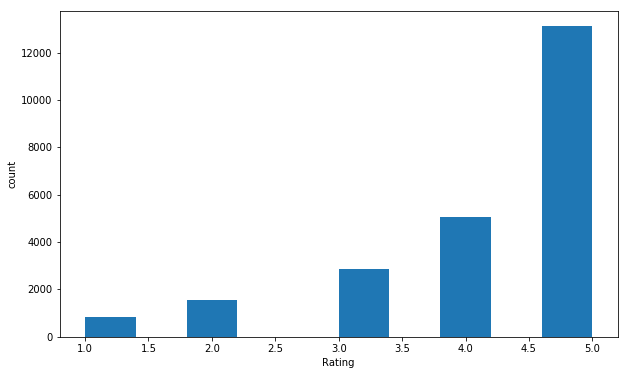

In [25]:
plt.figure(figsize=(10,6))
plt.hist(data['Rating'])
plt.xlabel("Rating")
plt.ylabel("count")
plt.show()

We have seen that most of people have given rating >3.0

#### Let's do crosstab to check rating and recommended ind relationship

In [30]:
crosstab=pd.crosstab(data['Rating'],data['Recommended IND']).T
crosstab

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


We found highly rated product recommended by websites. We want statistical methos to check whether website's recommendation depends on ratings or not

### Assumption:

H0 : Recommended IND are independent of ratings.
    
H1 : Recommended IND are not independent of ratings.
alpha : 0.05

In [31]:
alpha =0.05
Stats,Pvalue,degree_of_freedom,expected = chi2_contingency(crosstab)
if Pvalue>alpha:
    print("Failed to Reject Null Hyposthesis")
else:
    print("Rejected the Null Hypothesis")

Rejected the Null Hypothesis


#### Result shows that Recommendations are not independent of ratings

In [34]:
recommended = data[data['Recommended IND']==1]  #store all products which are recommended
not_recommended = data[data['Recommended IND']==0] # store all products which are not recommended

In [35]:
recommended['Rating'].value_counts()

5    13092
4     4909
3     1189
2       94
1       16
Name: Rating, dtype: int64

In [36]:
not_recommended['Rating'].value_counts()

3    1682
2    1471
1     826
4     168
5      25
Name: Rating, dtype: int64

Here, We can see that products which are recommended, has highest ratings and the products which are nor recommended has lowest rating

#### we can check it visually using histogram plot

#### plot different -different histogram for recommended and not recommended

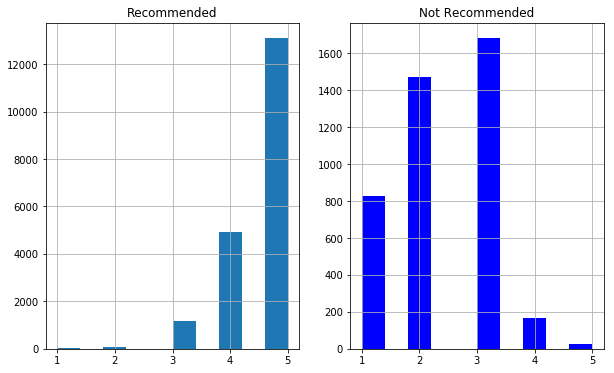

In [41]:
figsize,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
recommended['Rating'].hist(ax=ax1)
ax1.set_title("Recommended")
not_recommended['Rating'].hist(ax=ax2,color="blue")
ax2.set_title("Not Recommended")
plt.show()

#### In this way also, We can say that product rating depends on website recommendation.